In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\msuya\volume_pressure_data.csv")
# Path of the file is within the parentheses. Python does not like foreward-slash, so the "r" is needed to tell it how to read it properly.

In [3]:
data[0:5]

,Volume,Pressure
0,48,29.1250
1,46,30.5625
2,44,31.9375
3,42,33.5000
4,40,35.3125


In [4]:
print("mean:")
print(data.mean())
print()
print("median:")
print(data.median())
print()
print("standard deviation:")
print(data.std())
# Printing various statistics about the dataset

mean:
Volume      27.1200
Pressure    61.5075
dtype: float64

median:
Volume      24.0000
Pressure    58.8125
dtype: float64

standard deviation:
Volume      11.192706
Pressure    25.840546
dtype: float64


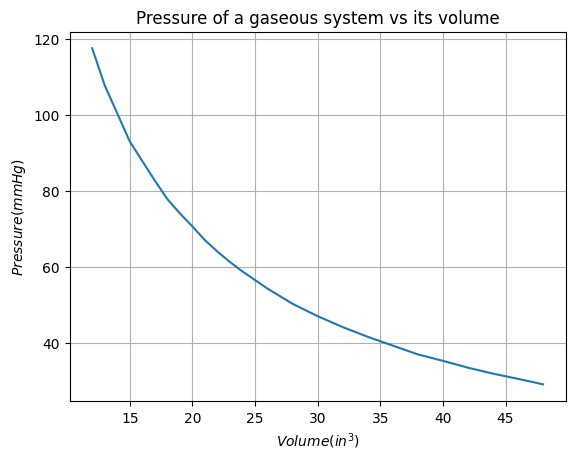

In [5]:
plt.plot(data.Volume,data.Pressure)
plt.xlabel("$Volume (in^3)$")
plt.ylabel("$Pressure (mmHg)$")
plt.title("Pressure of a gaseous system vs its volume")
plt.grid(True)
plt.show()
# Graph of the dataset

In [6]:
fit_2 = np.polyfit(data.Volume,data.Pressure,2)
fx = np.poly1d(fit_2)
print(fx)
# Creation of quadratic fit function

         2
0.08115 x - 6.933 x + 180.1


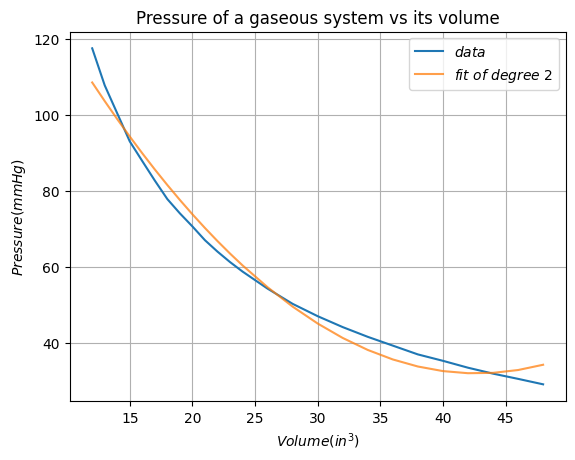

In [7]:
plt.plot(data.Volume,data.Pressure, label="$data$")
plt.plot(data.Volume,fx(data.Volume), label=r"$fit\ of\ degree\ 2$", alpha=.75)
plt.xlabel("$Volume (in^3)$")
plt.ylabel("$Pressure (mmHg)$")
plt.title("Pressure of a gaseous system vs its volume")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
fit_4 = np.polyfit(data.Volume,data.Pressure,4)
fx = np.poly1d(fit_4)
print(fx)
# Creation of 4th degree fit function

           4           3          2
0.0001178 x - 0.01704 x + 0.9387 x - 24.49 x + 301.9


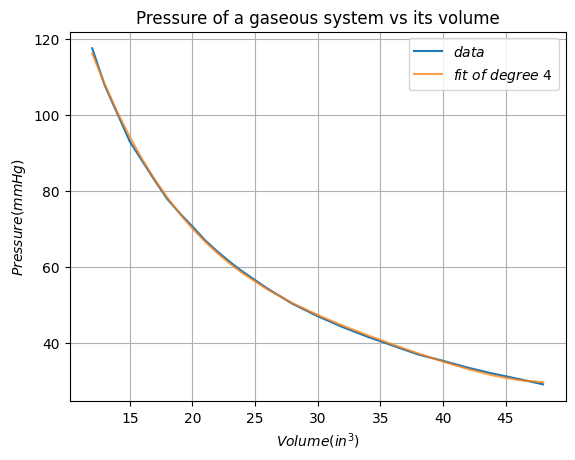

In [9]:
plt.plot(data.Volume,data.Pressure, label="$data$")
plt.plot(data.Volume,fx(data.Volume), label=r"$fit\ of\ degree\ 4$", alpha=.75)
plt.xlabel("$Volume (in^3)$")
plt.ylabel("$Pressure (mmHg)$")
plt.title("Pressure of a gaseous system vs its volume")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# the 4th degree fit will be analyzed in the following sections
print(np.poly1d(fit_4))

           4           3          2
0.0001178 x - 0.01704 x + 0.9387 x - 24.49 x + 301.9


The fit equation shown above is similar to the taylor series for the inverse equation: 1/(x-R), where R is a constant. This gives a pressure to volume equation of P=A/(V-R) with A and R as constants. This is similar to the ideal gas equation where pressure is inversely proportional to volume, with one difference: R. This likely matches with the constant "b" in the Van der Waals equation.

In [11]:
gx = np.poly1d(fit_4)

In [12]:
P = np.array(gx(data.Volume)) # The fit values for pressure
A = np.array(data.Pressure) # The actual values for pressure

In [13]:
def RMSE(A1, A2):
    x = np.sqrt(((A1-A2)**2).mean())
    return x
 # Calculates RMSE by subtracting each pair of values from both arrays, squaring it, taking the resulting array's mean, the square rooting it.

In [14]:
rmse = RMSE(P,A)
print("RMSE:") # Calculating the root-mean-square-error of the 4th degree polynomial.
print(rmse)

RMSE:
0.5038681744244871


Given that the RMSE value is relatively low compared to the mean pressure, the 4th degree polynomial is a good fit for the dataset.